In [7]:
#EXERCISE 2
import numpy as np 
from scipy import stats
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
import math 
plt.rcParams["figure.figsize"] = (13,8)


s_ , gamma_ , lam_ = 100, 0.1, 1
T = np.array([0.02, 0.08])
r_ = 0.04
sigma_ = 0.2
strikes = np.linspace(60, 150, 200)


def calc_d1(t, T, s, k, r, sigma, q=0):
    return ( np.log(s/k) + (r - q + 0.5*sigma**2)*(T-t) )/(sigma * np.sqrt(T-t))



def black_scholes_call(t, T, s, k, r, sigma, q = 0):
    d1 = ( np.log(s/k) + (r - q + 0.5*sigma**2)*(T-t) )/(sigma * np.sqrt(T-t))
    d2 = d1 - sigma * np.sqrt(T-t)
    price = s * np.exp(-q *(T-t))*scipy.stats.norm.cdf(d1) - k*np.exp(-r *(T-t))*scipy.stats.norm.cdf(d2)
    return price

def call_option_jump(t, T, s, k, r, sigma, gamma, lam, max_jump):
        jump = np.arange(0, max_jump+1)
        underlying = s * (1 - gamma)**jump
        price = black_scholes_call(t, T, underlying, k, r, sigma , q = -lam * gamma)
        weighted = probability(jump, T, lam) * price
        return weighted.sum()
 
        
def probability(k, T, lam):
     return np.exp(-lam*T) * (1/factorial(k))* (lam *T)**k
    
def factorial(n):
        return np.array([math.factorial(j) for j in n])
        
        

prices = np.empty((len(strikes), len(T)))
for row, strike in enumerate(strikes):
    for column,mat in enumerate(T):
        prices[row, column] = call_option_jump(t=0, T=mat, s=s_, k=strike, 
                                               r=r_, sigma=sigma_, gamma=gamma_, lam=lam_, 
                                               max_jump = 50)
        
    
undiscounted_prices = prices * np.exp(r_ * T)


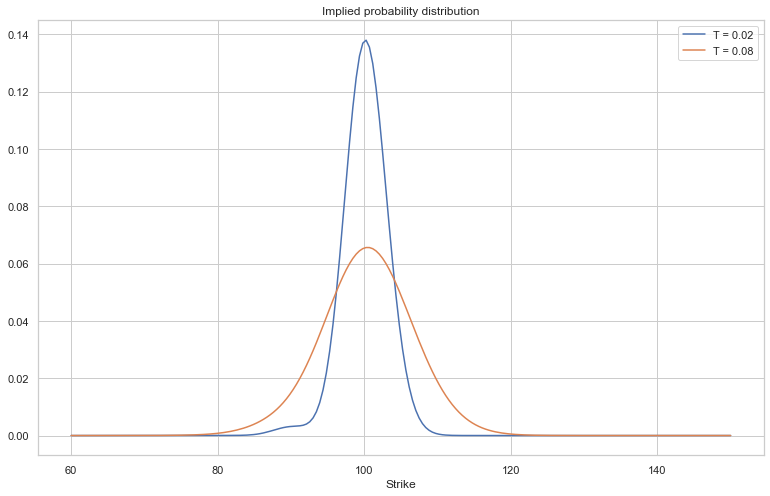

In [25]:
#let's consider a butterlfly function to estimate the secon derivative
def butterfly( t, T, s, k, r, sigma, gamma, lam, max_jump, dk = 0.001):
    call = lambda x: np.exp(r*T) *call_option_jump(t, T, s, x, r, sigma, gamma, lam, max_jump)
    to_divide = (1/dk)**2
    num = call(k+dk) - 2*call(k) + call(k-dk)
    return num*to_divide


dens = np.empty((len(strikes), len(T)))
for row, strike in enumerate(strikes):
    for column,mat in enumerate(T):
        dens[row, column] = butterfly(t=0, T=mat, s=s_, k=strike, 
                                               r=r_, sigma=sigma_, gamma=gamma_, lam=lam_, 
                                               max_jump = 100)

for j,t in enumerate(T):
    plt.plot(strikes, dens[:,j], label = f"T = {t}")
plt.legend()
plt.title("Implied probability distribution")
plt.xlabel("Strike")
plt.show()


# 

NameError: name 'phi' is not defined

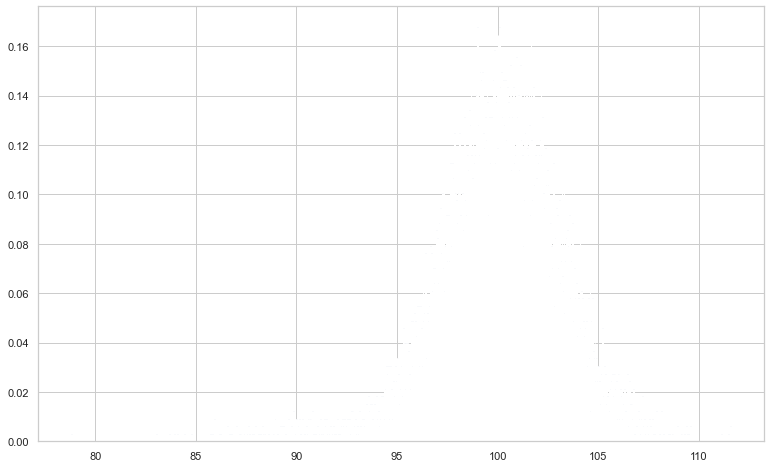

In [19]:
tau=0
q = 0
gamma = gamma_
sigma = sigma_
K = strikes
norm = np.random.normal(scale=np.sqrt(T[tau]), size=10000)
pois = np.random.poisson(lam=lam_*T[tau], size=10000)

#Compute the distributioin of S
S = 100*np.exp((r_-q+lam_*gamma - (np.power(sigma, 2)/2))*T[tau] + sigma*norm)*np.power((1-gamma),pois)
plt.hist(S, bins=1000, density=True)
plt.plot(K[1:-1], phi[:,0], linewidth=4, label=f'maturity {T[0]}')
plt.xlabel('Strike values')
plt.ylabel('Probability distribution')
plt.title('verification of the distiribution')
plt.legend()
plt.show()

